Examine the psd files and compute iffts for them.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits

plotpar = {'axes.labelsize': 18,
           'font.size': 10,
           'legend.fontsize': 18,
           'xtick.labelsize': 18,
           'ytick.labelsize': 18,
           'text.usetex': True}
plt.rcParams.update(plotpar)

Load the first fits file.

In [8]:
filename = "data/weighted_power_spectra/kplr001430163_kasoc-wpsd_llc_v1.fits"

In [18]:
with fits.open(filename) as hdul:
    hdul.info()
    hdr = hdul[0].header
    data = hdul[1].data

Filename: data/weighted_power_spectra/kplr001430163_kasoc-wpsd_llc_v1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   ()      
  1  POWERSPECTRUM    1 BinTableHDU     19   28159R x 2C   [D, D]   


In [16]:
hdr;

In [31]:
freq, power = zip(*data)
freq, power = np.array(freq), np.array(power)

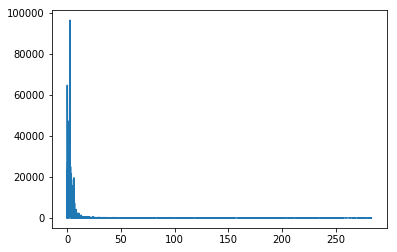

In [34]:
plt.plot(freq, power)

In [35]:
s = np.fft.ifft(power)

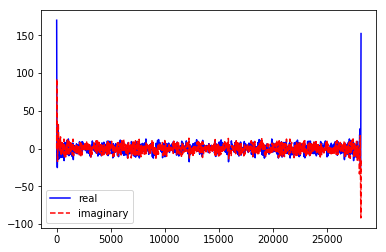

In [36]:
t = np.arange(len(power))
plt.plot(t, s.real, 'b-', t, s.imag, 'r--')
plt.legend(('real', 'imaginary'))

Now load all the light curves and save the real part of the ifft.

In [70]:
import glob
df = pd.read_csv("training_labels.csv")
filenames_v1 = ["data/weighted_power_spectra/kplr{0}_kasoc-wpsd_llc_v1.fits".format(str(kepid).zfill(9)) 
               for kepid in df.kepid.values]
filenames_v2 = ["data/weighted_power_spectra/kplr{0}_kasoc-wpsd_llc_v2.fits".format(str(kepid).zfill(9)) 
               for kepid in df.kepid.values]
filenames_v3 = ["data/weighted_power_spectra/kplr{0}_kasoc-wpsd_llc_v3.fits".format(str(kepid).zfill(9)) 
               for kepid in df.kepid.values]

In [87]:
def extract_ifft_real(filename_v1, filename_v2, filename_v3):
    try:
        with fits.open(filename_v3) as hdul:
            data = hdul[1].data
            flag = 1
    except FileNotFoundError:
        try:
            with fits.open(filename_v2) as hdul:
                data = hdul[1].data
                flag = 1
        except FileNotFoundError:
            try:
                with fits.open(filename_v1) as hdul:
                    data = hdul[1].data
                    flag = 1
            except FileNotFoundError:
                print("File not found", filename_v1, "possibly only short cadence version available. Skipping")
                freq, power = np.arange(100), np.zeros(100)
                data = zip(freq, power)
                flag = 0

    freq, power = zip(*data)
    freq, power = np.array(freq), np.array(power)
    s = np.fft.ifft(power)
    return s.real, s.imag, flag

In [134]:
import os
reals, flags = [], []
N = 200
for i, filename_v1 in enumerate(filenames_v1):
    print(i, "of", len(filenames_v1))
    
    ifft_file_name = "data/ifft_real/{}_ifft.csv".format(df.kepid.values[i])
    if os.path.exists(ifft_file_name):
        ifft_df = pd.read_csv(ifft_file_name)
        real, imag = ifft_df.real, ifft_df.imag
    
    else:
        real, imag, flag = extract_ifft_real(filename_v1, filenames_v2[i], filenames_v3[i])
        ifft = pd.DataFrame(dict({"real": real, "imag": imag}))
        ifft.to_csv(ifft_file_name)
        
    reals.append(np.abs(real))
    flags.append(flag)

0 of 525
1 of 525
2 of 525
3 of 525
4 of 525
5 of 525
6 of 525
7 of 525
8 of 525
9 of 525
10 of 525
11 of 525
File not found data/weighted_power_spectra/kplr003115178_kasoc-wpsd_llc_v1.fits possibly only short cadence version available. Skipping
12 of 525
File not found data/weighted_power_spectra/kplr003223000_kasoc-wpsd_llc_v1.fits possibly only short cadence version available. Skipping
13 of 525
14 of 525
15 of 525
16 of 525
File not found data/weighted_power_spectra/kplr003427720_kasoc-wpsd_llc_v1.fits possibly only short cadence version available. Skipping
17 of 525
18 of 525
19 of 525
20 of 525
21 of 525
22 of 525
23 of 525
24 of 525
25 of 525
26 of 525
27 of 525
28 of 525
29 of 525
30 of 525
31 of 525
32 of 525
33 of 525
34 of 525
35 of 525
36 of 525
37 of 525
38 of 525
39 of 525
40 of 525
41 of 525
42 of 525
43 of 525
44 of 525
45 of 525
46 of 525
47 of 525
48 of 525
49 of 525
50 of 525
51 of 525
52 of 525
53 of 525
54 of 525
55 of 525
56 of 525
57 of 525
58 of 525
59 of 525
60

In [125]:
pixel1 = np.array([reals[i][0] for i in range(N)])
m = flag > 0

In [131]:
len(filenames_v1)

525

/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


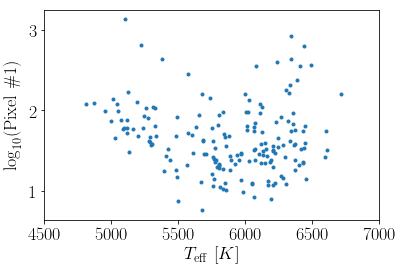

In [128]:
plt.plot(df.teff.values[:N][m][0], np.log10(pixel1[m][0]), ".")
plt.xlim(4500, 7000)
plt.xlabel("$T_{\mathrm{eff}}~[K]$")
plt.ylabel("$\log_{10}(\mathrm{Pixel~\#1})$")
plt.subplots_adjust(bottom=.15)
plt.savefig("pixel1_teff")

/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


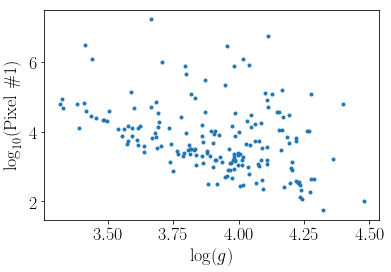

In [129]:
plt.plot(df.logg.values[:N][m][0], np.log(pixel1[m][0]), ".")
plt.xlabel("$\log(g)$")
plt.ylabel("$\log_{10}(\mathrm{Pixel~\#1})$")
plt.subplots_adjust(bottom=.15)
plt.savefig("pixel1_logg")

/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


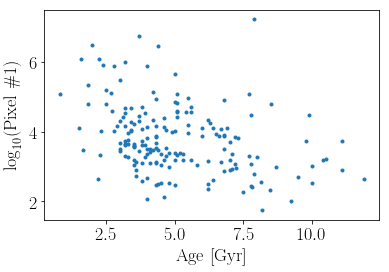

In [130]:
plt.plot(df.age.values[:N][m][0], np.log(pixel1[m][0]), ".")
plt.xlabel("$\mathrm{Age~[Gyr]}$")
plt.ylabel("$\log_{10}(\mathrm{Pixel~\#1})$")
plt.subplots_adjust(bottom=.15)
plt.savefig("pixel1_age")